## Learning from Imbalanced Datasets (Supervised and Unsupervised Learning)

### Registration Number : 2100346

## Wine quality classification

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from imblearn.datasets import make_imbalance
from sklearn.preprocessing import LabelEncoder

C:\Users\mindr\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# loading dataset from github

data = pd.read_csv('https://raw.githubusercontent.com/winsid07/CE888-/main/Data/Wine_Quality_Classification.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad


### Data exploration

In [3]:
df = data.copy()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [4]:
df.shape

(1599, 12)

In [5]:
# dataset detailed info

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [6]:
# Encoding object data type to numeric values

label = LabelEncoder()
df['quality'] = label.fit_transform(df['quality'])
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [7]:
# Missing values

df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
# Data Summary

df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.534709
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.498950
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


### Data visualization

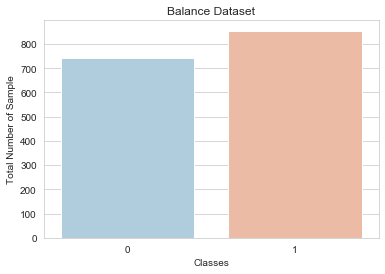

In [9]:
# Target outout class

sns.set_style('whitegrid')
fig= sns.countplot(x= df['quality'],data=df,palette='RdBu_r').get_figure()
plt.title('Balance Dataset')
plt.xlabel('Classes')
plt.ylabel('Total Number of Sample')
plt.show()
fig.savefig('histogram_org_wine.pdf')

In [10]:
# Distribution of target class
target_count = df['quality'].value_counts()
target_count

1    855
0    744
Name: quality, dtype: int64

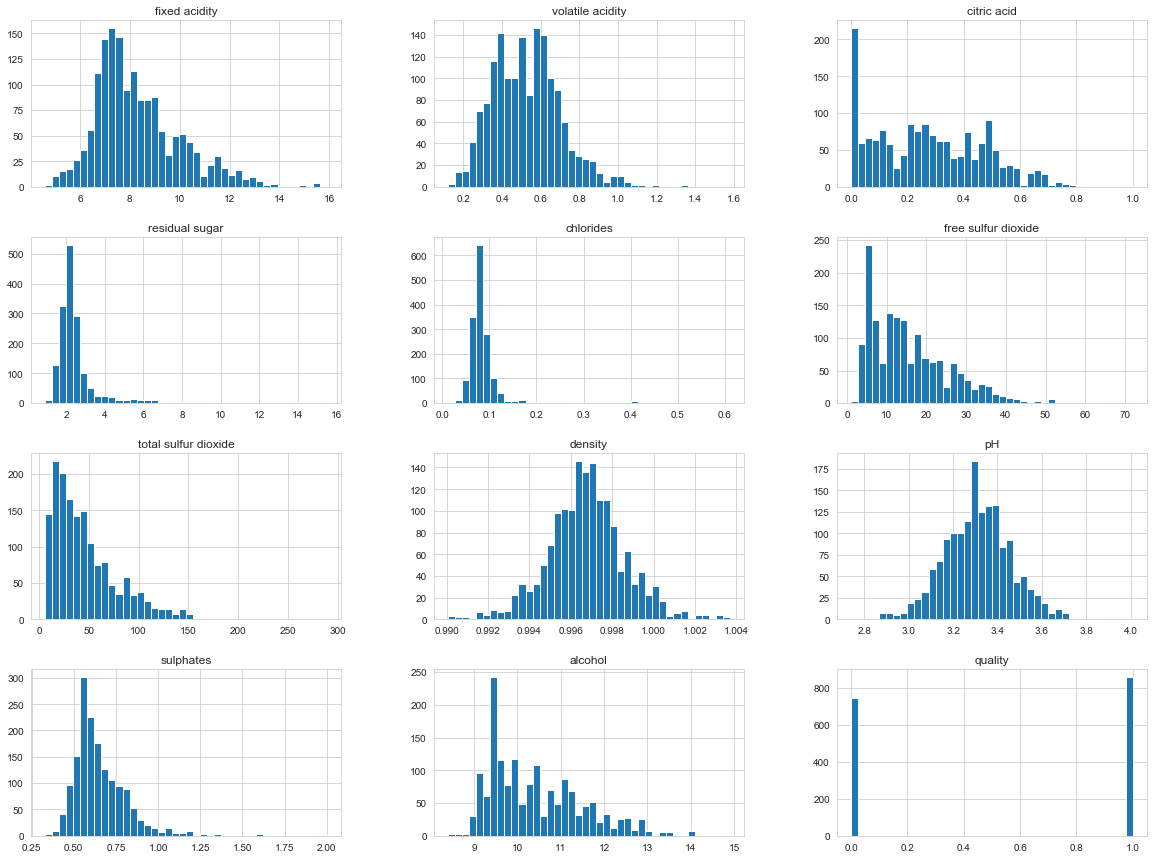

In [11]:
# Histogram Plots
pl = df.hist(bins=40, figsize=(20,15))

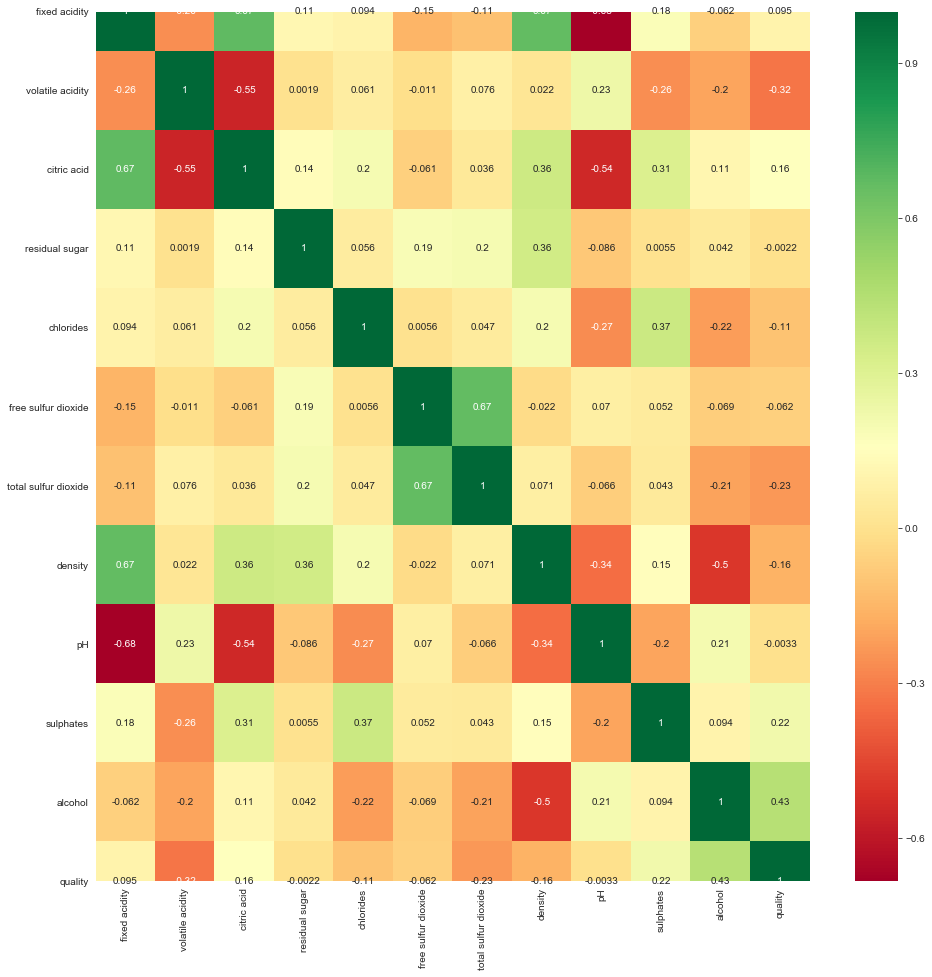

In [12]:
#correlations and ploting a heatmap

corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(16,16))

g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.show()

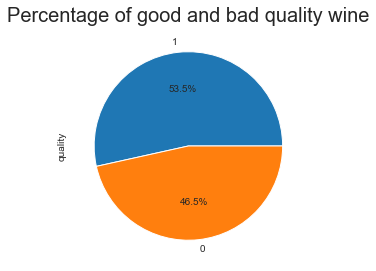

In [13]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(left=0, bottom=0.5, right=0.9, top=0.9, wspace=0.5, hspace=0.8)
plt.subplot(141)
plt.title('Percentage of good and bad quality wine',fontsize = 20)
fig = df['quality'].value_counts().plot.pie(autopct="%1.1f%%").get_figure()
fig.savefig('histogram_org_wine_piachart.pdf')

### Balanced dataset

In [14]:
#Checking the distributation

print(f'Distribution before imbalancing') 

target_count=df['quality'].value_counts()
print(target_count)

imbalance_target=(target_count[1] /(target_count[0] + target_count[1])) * 100
print(f'Balanced Percentage : {imbalance_target} %')

imbalance_target=(target_count[0] / (target_count[0] + target_count[1])) * 100
print(f'Balanced Percentage : {imbalance_target} %')

Distribution before imbalancing
1    855
0    744
Name: quality, dtype: int64
Balanced Percentage : 53.47091932457786 %
Balanced Percentage : 46.52908067542214 %


In [15]:
y_org = df['quality']
x_org = df.drop(['quality'],axis=1)

### New Imbalance

In [16]:
# Low Imbalance (65%)

x_low, y_low = make_imbalance(x_org, y_org, sampling_strategy = {0: 744 , 1: 400}, random_state = 42)


print(f'Distribution after low imbalancing') 

low_target_count= y_low.value_counts()
print(low_target_count)

low_imbalance_target=(low_target_count[1] /(low_target_count[0] + low_target_count[1])) * 100
print(f'Imbalance Percentage : {low_imbalance_target} %')

low_imbalance_target=(low_target_count[0] / (low_target_count[0] + low_target_count[1])) * 100
print(f'Imbalance Percentage : {low_imbalance_target} %')

Distribution after low imbalancing
0    744
1    400
Name: quality, dtype: int64
Imbalance Percentage : 34.96503496503497 %
Imbalance Percentage : 65.03496503496503 %


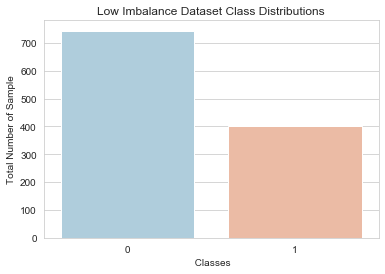

In [17]:
# Saving the fig

sns.set_style('whitegrid')
fig = sns.countplot(x = y_low,data=df,palette='RdBu_r').get_figure()
plt.title('Low Imbalance Dataset Class Distributions')
plt.xlabel(' Classes')
plt.ylabel('Total Number of Sample')
plt.show()
fig.savefig('histogram_low_wine.pdf')

In [18]:
# Medium Imbalance (75%)

x_medium, y_medium = make_imbalance(x_org, y_org, sampling_strategy = {0: 744 , 1: 248}, random_state = 42)


print(f'Distribution after medium imbalancing') 

medium_target_count= y_medium.value_counts()
print(medium_target_count)

medium_imbalance_target=(medium_target_count[1] /(medium_target_count[0] + medium_target_count[1])) * 100
print(f'Medium Imbalance Percentage : {medium_imbalance_target} %')


medium_imbalance_target=(medium_target_count[0] /(medium_target_count[0] + medium_target_count[1])) * 100
print(f'Medium Imbalance Percentage : {medium_imbalance_target} %')


Distribution after medium imbalancing
0    744
1    248
Name: quality, dtype: int64
Medium Imbalance Percentage : 25.0 %
Medium Imbalance Percentage : 75.0 %


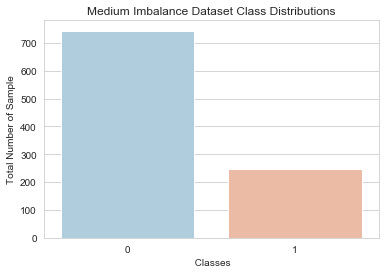

In [19]:
#Saving figure

sns.set_style('whitegrid')
fig = sns.countplot(x = y_medium,data=df,palette='RdBu_r').get_figure()
plt.title('Medium Imbalance Dataset Class Distributions')
plt.xlabel(' Classes')
plt.ylabel('Total Number of Sample')
plt.show()

fig.savefig('histogram_medium_wine.pdf')

In [20]:
# High Imbalance (90%)

x_high, y_high = make_imbalance(x_org, y_org, sampling_strategy = {0: 744 , 1: 82}, random_state = 42)


print(f'Distribution after high imbalancing') 

high_target_count= y_high.value_counts()
print(high_target_count)

high_imbalance_target=(high_target_count[1] /(high_target_count[0] + high_target_count[1])) * 100
print(f'High Imbalance Percentage : {high_imbalance_target} %')

high_imbalance_target=(high_target_count[0] /(high_target_count[0] + high_target_count[1])) * 100
print(f'High Imbalance Percentage : {high_imbalance_target} %')


Distribution after high imbalancing
0    744
1     82
Name: quality, dtype: int64
High Imbalance Percentage : 9.927360774818402 %
High Imbalance Percentage : 90.07263922518159 %


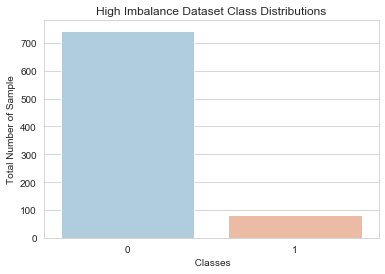

In [21]:
#Saving figure

sns.set_style('whitegrid')
fig = sns.countplot(x = y_high,data=df,palette='RdBu_r').get_figure()
plt.title('High Imbalance Dataset Class Distributions')
plt.xlabel(' Classes')
plt.ylabel('Total Number of Sample')
plt.show()

fig.savefig('histogram_high_wine.pdf')

In [22]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import make_scorer

## Load Data

In [23]:
df=pd.read_csv('wine_low.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,output
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0


In [24]:
columns=df.columns
columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'output'],
      dtype='object')

In [25]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

## Baseline 1: Random Forest

C:\Users\mindr\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.90      0.94      0.92       154
           1       0.86      0.79      0.82        75

    accuracy                           0.89       229
   macro avg       0.88      0.86      0.87       229
weighted avg       0.89      0.89      0.89       229



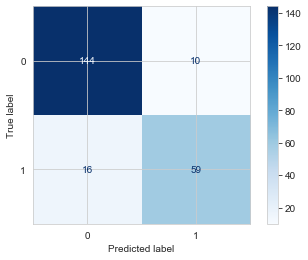

In [26]:
clf_rf=RandomForestClassifier(n_jobs=2,random_state=0)
clf_rf.fit(X_train,y_train)
y_predict=clf_rf.predict(X_test)
plot_confusion_matrix(clf_rf,X_test,y_test, cmap=plt.cm.Blues)
print(classification_report(y_test, y_predict))

In [27]:
score1_rf=accuracy_score(y_test,y_predict)
print("Accuracy (without cross-validation) : {}".format(score1_rf))

score2_rf = cross_val_score(clf_rf, X_train, y_train, cv=10)
print(score2_rf)
print("Accuracy (after cross-validation): {} (+/- {})".format(score2_rf.mean(),score2_rf.std()))

score3_rf = cross_val_score(clf_rf, X_train, y_train, cv=10,scoring=make_scorer(cohen_kappa_score))
print(score3_rf)
print("Cohen Kappa Score (after cross-validation): {} (+/- {})".format(score3_rf.mean(),score3_rf.std()))

Accuracy (without cross-validation) : 0.8864628820960698
[0.85869565 0.89130435 0.82608696 0.82608696 0.83695652 0.92307692
 0.9010989  0.82417582 0.91208791 0.85714286]
Accuracy (after cross-validation): 0.8656712852365027 (+/- 0.03628184532360681)
[0.69889225 0.76054138 0.61686622 0.6116095  0.64322647 0.83008802
 0.77834912 0.62512873 0.80440623 0.67508926]
Cohen Kappa Score (after cross-validation): 0.7044197189809338 (+/- 0.07849004963162173)


# Partitioning the dataset into 10 bins, keeping the imbalance ratio from the original dataset

In [28]:
#Original Imbalance

target_count=df.output.value_counts()
print(target_count)

imbalance_target=(target_count[1]/(target_count[0]+target_count[1]))*100
print(imbalance_target)

0    744
1    400
Name: output, dtype: int64
34.96503496503497


In [29]:
def create_bins (df,no_of_bins,orig_imbalance):
    df_class0=df[df['output']==0]
    df_class1=df[df['output']==1]

    len0=int(len(df_class0)/no_of_bins)
    len1=int(len(df_class1)/no_of_bins)

    ind0=0
    ind1=0
    start0=0
    start1=0

    bins=[]

    print("Original Imbalance in the dataset: {} %".format(orig_imbalance))
    for i in range(no_of_bins):
        ind0+=len0
        ind1+=len1
        bin_=pd.concat([df_class1.iloc[start1:ind1,:],df_class0.iloc[start0:ind0,:]])
        target_cnt=bin_.output.value_counts()
        imbalance=(target_cnt[1]/(target_cnt[0]+target_cnt[1]))*100
        print("Class imbalance ratio in bin {} : {} %".format(i,imbalance))
        bins.append(bin_.values)
        start0+=len0
        start1+=len1

    return bins

In [30]:
bins= create_bins(df,10, imbalance_target)

Original Imbalance in the dataset: 34.96503496503497 %
Class imbalance ratio in bin 0 : 35.08771929824561 %
Class imbalance ratio in bin 1 : 35.08771929824561 %
Class imbalance ratio in bin 2 : 35.08771929824561 %
Class imbalance ratio in bin 3 : 35.08771929824561 %
Class imbalance ratio in bin 4 : 35.08771929824561 %
Class imbalance ratio in bin 5 : 35.08771929824561 %
Class imbalance ratio in bin 6 : 35.08771929824561 %
Class imbalance ratio in bin 7 : 35.08771929824561 %
Class imbalance ratio in bin 8 : 35.08771929824561 %
Class imbalance ratio in bin 9 : 35.08771929824561 %


In [31]:
model_accuracies={} 
model_kappa_scores={}

# Analyzing the number of clusters using Elbow method and Silhouette method¶

C:\Users\mindr\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  


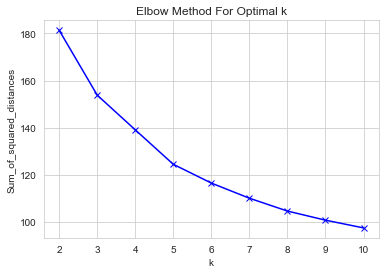

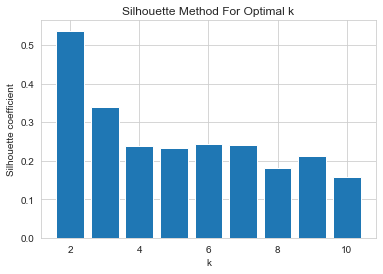

In [32]:
#***** CHANGE MANUALLY DURING EACH ITERATION *****#

i=9 # The bin index to be left-out while training, and used only for testing 

#************************************************#

#CREATE TESTING DATA

leave_out=i #for indexing while saving the model accuracies to a dictionary
test_data=bins[i] 

#CREATE TRAINING DATA

compile9=np.vstack((bins[j] for j in range(10) if j!=i )) #combining data from all other bins except the left-out one
data=pd.DataFrame(compile9)
data.columns=columns
mms=MinMaxScaler() #normalizing the data
mms.fit(data)
data_transformed=mms.transform(data)

#ELBOW METHOD TO IDENTIFY THE NUMBER OF CLUSTERS

Sum_of_squared_distances = []
K = range(2,11)
for k in K:
    km = KMeans(n_clusters=k,random_state=1)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#SILHOUETTE METHOD TO IDENTIFY THE NUMBER OF CLUSTERS
K = range(2,11)
no_of_clusters=[]
silhouette_scores=[]

for k in K:
    km = KMeans(n_clusters=k,random_state=1)
    preds=km.fit_predict(data_transformed)
    centers=km.cluster_centers_

    score=silhouette_score(data_transformed,preds)

    no_of_clusters.append(k)
    silhouette_scores.append(score)

plt.ylabel("Silhouette coefficient")
plt.xlabel("k")
plt.title('Silhouette Method For Optimal k')
plt.bar(no_of_clusters,silhouette_scores)
plt.show()

In [33]:
#*****CHANGE MANUALLY DURING EACH ITERATION*****#

num_of_clusters=3 #Decided after looking at the plots from the previous cell 

#***********************************************#

min_class=0 # The minority class label
max_class=1 # The majority class label

#***********************************************#

#FITTING A K-MEANS CLUSTERING MODEL

kmeans = KMeans(n_clusters=num_of_clusters, random_state=1)
kmeans.fit_predict(data_transformed)

cluster_df=data
cluster_df["Cluster label"]=kmeans.labels_
cols=list(cluster_df.columns)
cols= cols[:-2] + [cols[-1]] + [cols[-2]]
cluster_df=cluster_df[cols]
  
g=globals() #To facilitate naming dynamically

#Filtering out the data belonging to each cluster

for i in range(0,num_of_clusters):
    g['cluster_{}'.format(i)] = cluster_df[cluster_df['Cluster label']==i]

#Checking for number of entries from minority class in each cluster

for i in range(0,num_of_clusters):
    g['clus_{}_class_{}'.format(i,min_class)] = g['cluster_{}'.format(i)][g['cluster_{}'.format(i)]['output']==min_class]
    if (len(g['clus_{}_class_{}'.format(i,min_class)])!=0):
        g['X{}'.format(i)]=g['cluster_{}'.format(i)].iloc[:,:-1]
        g['y{}'.format(i)]=g['cluster_{}'.format(i)].iloc[:,-1]
        g['clf_{}'.format(i)]=RandomForestClassifier(n_jobs=2,random_state=0)
        g['clf_{}'.format(i)].fit(g['X{}'.format(i)],g['y{}'.format(i)])
        g['Class_val_{}{}'.format(i,min_class)]=min_class
    else:
        g['Class_val_{}{}'.format(i,min_class)]=max_class
  


test_cluster =pd.DataFrame(test_data)
test_cluster.columns=df.columns
test_cluster["Cluster label"]=kmeans.predict(test_data)
cols=list(test_cluster.columns)
cols= cols[:-2] + [cols[-1]] + [cols[-2]]
test_cluster=test_cluster[cols]

#Dividing the results based on cluster label, to predict the class labels of the corresponding entries

for i in range(0,num_of_clusters):
    g['test_{}'.format(i)] = test_cluster[test_cluster['Cluster label']==i]
    if(len(g['test_{}'.format(i)])!=0):
        if(g['Class_val_{}{}'.format(i,min_class)]==min_class): #Checking if the dataset contains values from both the classes
            g['X_test{}'.format(i)]=g['test_{}'.format(i)].iloc[:,:-1]
            g['y_test{}'.format(i)]=g['test_{}'.format(i)].iloc[:,-1]
            g['y_pred{}'.format(i)]=g['clf_{}'.format(i)].predict(g['X_test{}'.format(i)])
            g['test_{}'.format(i)]['Predicted class']=g['y_pred{}'.format(i)]
        else:
            g['y_pred{}'.format(i)]=np.full(len(g['test_{}'.format(i)]),max_class)
            g['test_{}'.format(i)]['Predicted class']=g['y_pred{}'.format(i)]

#Compiling the results and predictions for performance checking

final_test=pd.concat([g['test_{}'.format(i)] for i in range(0,num_of_clusters) if(len(g['test_{}'.format(i)])!=0)])
trial_accuracy=accuracy_score(final_test.iloc[:,-2],final_test.iloc[:,-1]) #computing accuracy based on real class labels
print("Accuracy : {}".format(trial_accuracy))

model_accuracies[leave_out]=trial_accuracy #Saving the accuracy for this permutation
trial_kappa =cohen_kappa_score(y_test, y_predict, labels=None, weights=None)
model_kappa_scores[leave_out]=trial_kappa #Saving the cohen kappa score for this permutation

Accuracy : 0.6491228070175439


In [34]:
acc_values=np.array([model_accuracies[k] for k in model_accuracies])
acc_values

array([0.64912281])

In [35]:
kappa_values=np.array([model_kappa_scores[k] for k in model_kappa_scores])
kappa_values

array([0.73685141])

In [36]:
from sklearn.metrics import make_scorer

print("Random Forest model:")
print("Accuracy (after cross-validation): {} (+/- {})".format(score2_rf.mean(),score2_rf.std()))
print("New model:")
print("Accuracy : {} (+/- {})".format(acc_values.mean(),acc_values.std()))

Random Forest model:
Accuracy (after cross-validation): 0.8656712852365027 (+/- 0.03628184532360681)
New model:
Accuracy : 0.6491228070175439 (+/- 0.0)


In [37]:
print("Kappa Scores:")
print("Random Forest: : {} (+/- {})".format(score3_rf.mean(),score3_rf.std()))
print("New Model: : {} (+/- {})".format(kappa_values.mean(),kappa_values.std()))

Kappa Scores:
Random Forest: : 0.7044197189809338 (+/- 0.07849004963162173)
New Model: : 0.7368514098824361 (+/- 0.0)


## Permutation Tests

In [38]:
def calc_pvalue(iterations,data_1,data_2,t_obs):
    concat = np.concatenate((data_1,data_2))
    cnt=0
    for i in range(0,iterations):
        perm = np.random.permutation(concat)
        pcurrent = perm[:len(data_1)]
        pnew = perm[len(data_1):]
        mean_perm_current=pcurrent.mean()
        mean_perm_new=pnew.mean()
        t_perm=mean_perm_new-mean_perm_current
        if(t_perm>t_obs):
            cnt+=1
            p_value=cnt/iterations
    return p_value